# AML 2203- Advanced Python AI and ML Tools 2024

### Group 2- Team Members

-  Adriana Marcela Penaranda Baron  **c0898944**
-  Carlos Munoz Ebratt  **c0892588**
-  Carlos Rey Pinto **c0868575**
-  Kanishka Malhotra **c0895937**
-  Yash Sahu **c0895287**

### Asignation

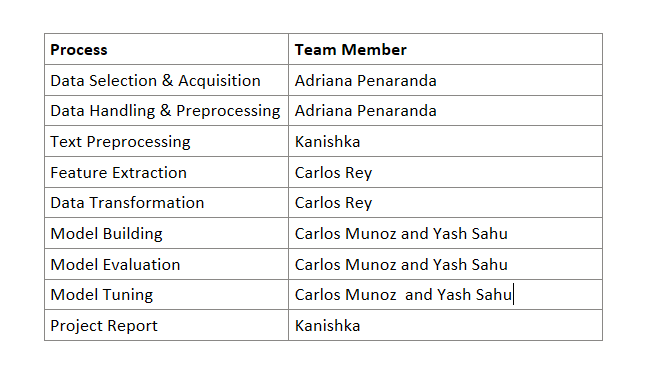

In [1]:
#import libraries 

import re
import json
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble                import RandomForestClassifier
from sklearn.model_selection         import GridSearchCV
from sklearn.model_selection         import cross_val_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore')

## 1. Data Selection & Acquisition:

This dataset chosen was taken from Kaggle:

https://www.kaggle.com/datasets/vivekgediya/ecommerce-product-review-data?select=Product+Review+Data.csv


The chosen dataset is the Amazon Product Reviews dataset, selected for its diverse range of product categories and user opinions, providin abundant e textual data for sentiment analysis. Essentially, it contains detailed text that allows us to delve into people's sentiments, alongside ratings and additional information aiding predictive analysis. Ultimately,The objectiveof this project is to construct a classification model that utilizes the text of the review along with other factors,to predict whether the rating will be **positive or negative.**.

In [2]:
# Loading the Dataset
df = pd.read_csv("Product Review Data.csv")
df.head(2)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams


**Description of each attribute**

-  id: Unique identifier for each entry.
-  asins: Amazon Standard Identification Numbers (ASINs) associated with the product.
-  brand: The name of the product's brand.
-  categories: The category of the product.
-  colors: Color options available for the product.
-  dateAdded: Date when the product information was added to the database.
-  dateUpdated: The date indicating the most recent update of the product information.
-  dimension: Dimensions of the product (e.g., length, width, height).
-  ean: International Article Number (EAN) associated with the product.
-  keys: Keywords or search terms associated with the product.
-  manufacturer: The manufacturer of the product.
-  manufacturerNumber: Manufacturer's identification number for the product.
-  name: Name of the product.
-  prices: Pricing information for the product.
-  reviews.date: Date when the review was posted.
-  reviews.doRecommend: Indicates whether the reviewer recommends the product or not.
-  reviews.numHelpful: Number of users who found the review helpful.
-  reviews.rating: Rating given by users for the product.
-  reviews.sourceURLs: URLs to the source of the reviews.
-  reviews.text: Text content of the reviews.
-  reviews.title: Title of the reviews.
-  reviews.userCity: City information of the user posting the review (if available).
-  reviews.userProvince: Province information of the user posting the review (if available).
-  reviews.username: Username of the user posting the review.
-  sizes: Size options available for the product.
-  upc: Universal Product Code (UPC) associated with the product.
-  weight: Weight of the product.

## 2. Data Handling & Preprocessing

In [3]:
df.shape

(1597, 27)

In [4]:
# basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

**Observations:**
- Thisis datasecontains 1597 6 entries and 13 attributes
- The 'ean' and 'upc' columns are stored as float64 but should be object type, being identification codes.
- Majority of the columns are of type object, indicating textual or categorical data
- 
Several columns such as 'colors', 'dimension', 'ean', 'manufacturer', 'manufacturerNumber', 'reviews.date', 'reviews.doRecommend', 'reviews.numHelpful', 'reviews.ratingnd 'reviews.titleand 'weight' ' have missing valu that will need to handle for the machine learning model.
-
Columns like 'reviews.userCity', 'reviews.userProvince', and 'siz have no non-null values, uthis indicate we will need to drop them because they dont provide useful information. oducts.pped.

### Primary Data Exploration

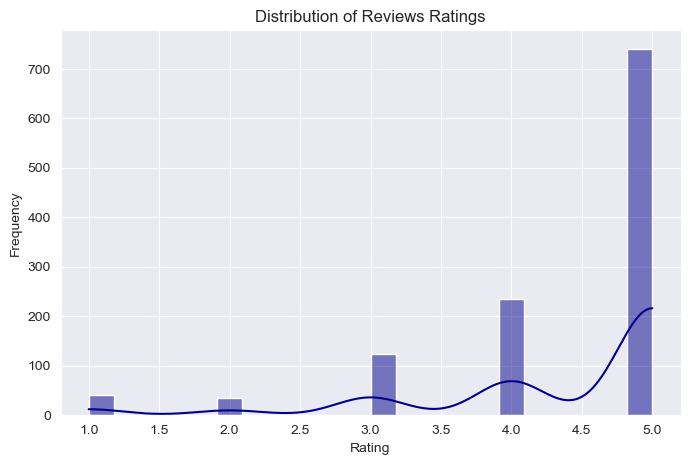

In [5]:
# Visualize distribution of 'reviews.rating' column using matplotlib and seaborn library

# Set the style
sns.set_style("darkgrid")

# Visualize distribution of 'reviews.rating' column using matplotlib and seaborn library
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='reviews.rating', kde=True, color= '#00008B')
plt.title('Distribution of Reviews Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

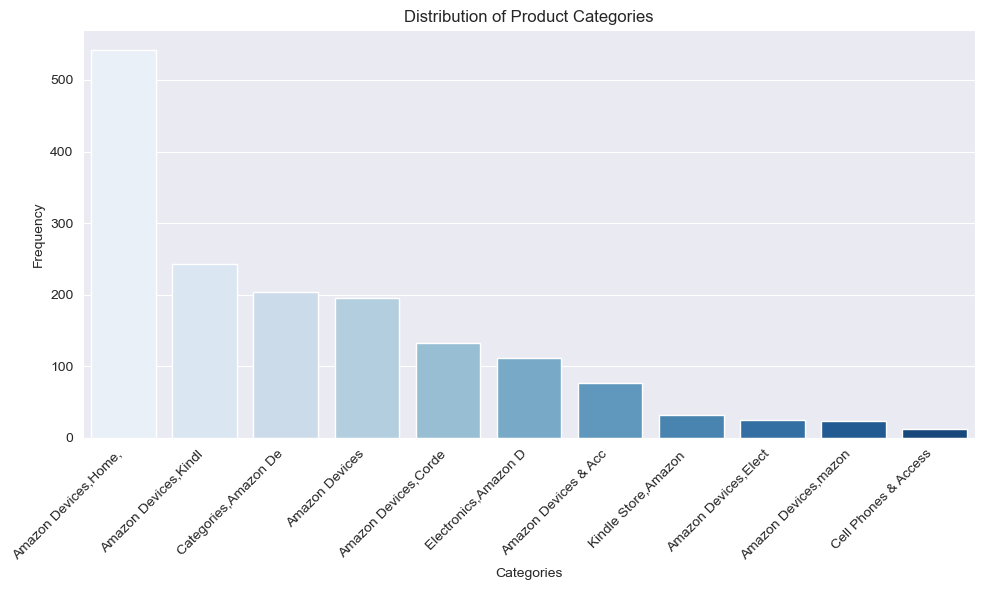

In [6]:
#Visualizing the Distribution of Product Categories

# Get the frequency of each category
category_counts = df['categories'].str[:20].value_counts() #The name of categories is too long so we limited to the first 20 characters
# Extract categories and their counts
categories = category_counts.index
counts = category_counts.values

# Create a countplot with ordered categories based on frequency
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['categories'].str[:20], order=categories, palette='Blues')
plt.title('Distribution of Product Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Now, We will clean the dataset following the next steps:
-  1. Coverting the data types of cols if there is need
-  2. Finding the duplicates and handling them
-  3. Looking for missing values
-  4. Filling the missing values
-  5. Checking for outliers


### Data Type Conversion

In [7]:
#Coverting the data types of cols "ean" and "upc"

def convert_to_object_type(df, columns):
    return df.astype({col: str for col in columns})

df = convert_to_object_type(df, ['ean', 'upc'])
df.dtypes

id                       object
asins                    object
brand                    object
categories               object
colors                   object
dateAdded                object
dateUpdated              object
dimension                object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
prices                   object
reviews.date             object
reviews.doRecommend      object
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
sizes                   float64
upc                      object
weight                   object
dtype: object

### Finding the duplicates

In [8]:
df[df.duplicated()]

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight


In [9]:
#Lets check if there's any duplicate without the "id"
test=df.copy()
test.drop(columns=['id'], inplace=True)
test[test.duplicated()]

,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,manufacturer,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight


### Dealing with missing values

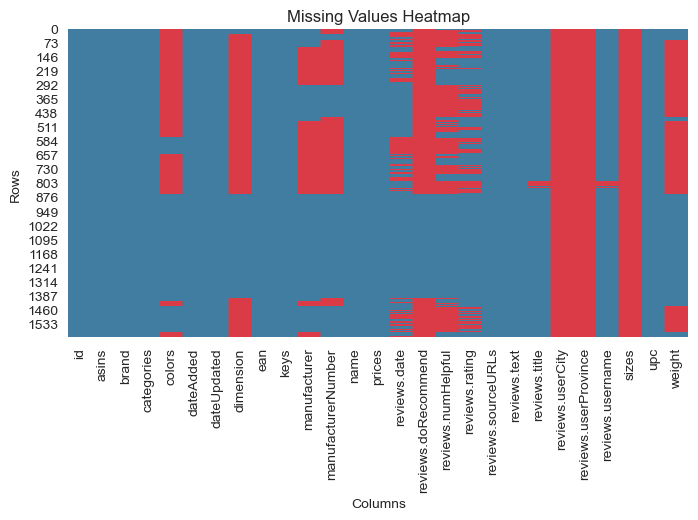

In [10]:
# Create a custom colormap with a mix of grey and blue
cmap = sns.diverging_palette(235, 10, as_cmap=True)

# Create a heatmap of missing values with the custom colormap
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cmap=cmap, cbar=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [11]:
#Lets see the detail of missing values
# Calculate the total number of rows
total_rows = len(df)

# Calculate the number of missing values for each column
missing_values = df.isna().sum()

# Calculate the percentage of missing values for each column
percentage_missing = (missing_values / total_rows) * 100

# Create a DataFrame to store the results
missing_data_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage Missing': percentage_missing.values
})

print(missing_data_df)

                  Column  Missing Values  Percentage Missing
0                     id               0            0.000000
1                  asins               0            0.000000
2                  brand               0            0.000000
3             categories               0            0.000000
4                 colors             823           51.534126
5              dateAdded               0            0.000000
6            dateUpdated               0            0.000000
7              dimension            1032           64.621165
8                    ean               0            0.000000
9                   keys               0            0.000000
10          manufacturer             632           39.574202
11    manufacturerNumber             695           43.519098
12                  name               0            0.000000
13                prices               0            0.000000
14          reviews.date             380           23.794615
15   reviews.doRecommend

In [12]:
#Dropping the columns without information or 100% nulls
df.drop(columns=['reviews.userCity','reviews.userProvince','sizes'], inplace=True)
df.head(2)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,nan,kindlepaperwhite/b00qjdu3ky,...,2015-08-08T00:00:00.000Z,NaN,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M,nan,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,nan,kindlepaperwhite/b00qjdu3ky,...,2015-09-01T00:00:00.000Z,NaN,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky,nan,205 grams


**Note:** We have decidedd to exclude null values from the target variable to ensure data integrity and mitigate potential biases in subsequent analysis or modeling proceses"

In [13]:
#Removing the nulls of the target variable "rating" 
df.dropna(subset=['reviews.rating'], inplace=True)
df.shape

(1177, 24)

In [14]:
df.head(2)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,nan,kindlepaperwhite/b00qjdu3ky,...,2015-08-08T00:00:00.000Z,NaN,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M,nan,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,nan,kindlepaperwhite/b00qjdu3ky,...,2015-09-01T00:00:00.000Z,NaN,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky,nan,205 grams


In [15]:
df['categories'].unique()

array(['Amazon Devices,mazon.co.uk',
       'Kindle Store,Amazon Devices,Electronics',
       'Categories,Amazon Devices,Streaming Media Players',
       'Amazon Devices',
       'Categories,Amazon Devices,Electronics Features,Streaming Media Players,Consumer Electronics,See more Amazon Fire TV Digital HD Media Streamer (Late...',
       'Amazon Devices & Accessories,Amazon Device Accessories,Power Adapters & Cables,Kindle Store,Kindle E-Reader Accessories,Kindle Paperwhite Accessories',
       'Amazon Devices,Kindle Store', 'Electronics,Amazon Devices',
       'Amazon Devices,Kindle Accessories',
       'Amazon Devices,Electronics,Kindle Store',
       'Amazon Devices,Electronics,Kindle Store,Amazon Echo',
       'Amazon Devices,Kindle Store,Kindle Accessories',
       'Amazon Devices,Kindle Store,buy a kindle',
       'Amazon Devices,Home,Smart Home & Connected Living,Smart Hubs & Wireless Routers,Smart Hubs,Home Improvement,Home Safety & Security,Alarms & Sensors,Home Security,Amazo

**Note:** The product categories is going to be removed because its extensive content, detailing product categories, doesn't directly contribute to predicting whether a review is positive or negative.

In [16]:
# Let's remove irrelevant columns 

# List of columns to drop
columns_to_drop = ['id','categories', 'dimension','colors', 'reviews.date', 'dateAdded', 'dateUpdated','ean', 'keys','manufacturerNumber', 'name',
                   'reviews.sourceURLs', 'upc', 'reviews.username','reviews.title']

# Drop the irrelevant columns
df.drop(columns=columns_to_drop, inplace=True)
df.shape

(1177, 9)

In [17]:
#Lets see the detail of missing values
# Calculate the total number of rows
total_rows = len(df)

# Calculate the number of missing values for each column
missing_values = df.isna().sum()

# Calculate the percentage of missing values for each column
percentage_missing = (missing_values / total_rows) * 100

# Create a DataFrame to store the results
missing_data_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage Missing': percentage_missing.values
})

print(missing_data_df)

                Column  Missing Values  Percentage Missing
0                asins               0            0.000000
1                brand               0            0.000000
2         manufacturer             451           38.317757
3               prices               0            0.000000
4  reviews.doRecommend             638           54.205607
5   reviews.numHelpful             277           23.534410
6       reviews.rating               0            0.000000
7         reviews.text               0            0.000000
8               weight             525           44.604928


In [18]:
# Handling missing values 

# Filling missing values of "manufacturer" column with Unknown information
df['manufacturer'].fillna('Unknown', inplace = True)

# Filling missing values of "reviews.doRecommend" with median
df['reviews.doRecommend'].fillna(df['reviews.doRecommend'].median(), inplace = True)

# Filling missing values of "reviews.numHelpful" with 0
df['reviews.numHelpful'].fillna(0, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1177 entries, 0 to 1596
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asins                1177 non-null   object 
 1   brand                1177 non-null   object 
 2   manufacturer         1177 non-null   object 
 3   prices               1177 non-null   object 
 4   reviews.doRecommend  1177 non-null   object 
 5   reviews.numHelpful   1177 non-null   float64
 6   reviews.rating       1177 non-null   float64
 7   reviews.text         1177 non-null   object 
 8   weight               652 non-null    object 
dtypes: float64(2), object(7)
memory usage: 92.0+ KB


In [19]:
#Let's review the mixed of information in "weight" column
df['weight'].value_counts()

weight
1.75 lbs      542
1.6 ounces     19
4 ounces       19
2.4 ounces     17
205 grams      15
0.8 ounces     12
5 ounces       12
4.6 ounces     10
1.1 pounds      6
Name: count, dtype: int64

**Note:**  The 'weight' column contains mixed data types, including ounces, pounds, grams, etc., which need to be standardized for consistenc in the next step- 

In [20]:
def convert_to_grams(weight):

    weight = str(weight).strip().lower()
    if 'lbs' in weight:
        return float(weight.replace('lbs', '').strip())
    elif 'ounces' in weight:
        return float(weight.replace('ounces', '').strip()) / 16  # 1 pound = 16 ounces
    elif 'grams' in weight:
        return float(weight.replace('grams', '').strip()) / 453.592  # 1 pound = 453.592 grams
    else:
        return None  # Handling unknown units or missing values

# Apply conversion function to 'weight' column
df['weight_in_pounds'] = df['weight'].apply(convert_to_grams)

#Removing the original "weight" column
df.drop('weight', axis = 1, inplace = True)

# Filling missing values with zero 
df['weight_in_pounds'].fillna(0, inplace = True)

df.head(2)

,asins,brand,manufacturer,prices,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,weight_in_pounds
0,B00QJDU3KY,Amazon,Amazon,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",1.0,139.0,5.0,I initially had trouble deciding between the p...,0.451948
1,B00QJDU3KY,Amazon,Amazon,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",1.0,126.0,5.0,Allow me to preface this with a little history...,0.451948


In [21]:
# descriptive statistics of the numerical columns
df.describe()

,reviews.numHelpful,reviews.rating,weight_in_pounds
count,1177.000000,1177.000000,1177.000000
mean,63.913339,4.359388,0.825577
std,175.986783,1.021445,0.857396
min,0.000000,1.000000,0.000000
25%,0.000000,4.000000,0.000000
50%,0.000000,5.000000,0.250000
75%,8.000000,5.000000,1.750000
max,997.000000,5.000000,1.750000


In [22]:
# descriptive statistics for categorical columns
df.describe(include='object')

,asins,brand,manufacturer,prices,reviews.doRecommend,reviews.text
count,1177,1177,1177,1177,1177.0,1177
unique,54,2,3,66,2.0,908
top,B01BH83OOM,Amazon,Amazon,"[{""amountMax"":129.99,""amountMin"":129.99,""curre...",1.0,While I've purchased items from Amazon for yea...
freq,542,1165,649,542,1141.0,38


**Note:**  The 'prices' column contained nested 
JSON document.y, indicating thait is necessaryt additional processigy to extract relevant price information for further analysis.

In [23]:
# Convert list of dictionaries to JSON strings
json_strings = [json.dumps(item) for item in df]

# Clean the prices column
def clean_prices(prices):
    try:
        price_info = json.loads(prices)
        for entry in price_info:
            if entry.get('currency') == 'USD':
                return entry['amountMax']
        return None
    except:
        return None

# Apply the cleaning function to the prices column
df['cleaned_prices'] = df['prices'].apply(clean_prices)

#Removing the original "prices" column
df.drop('prices', axis = 1, inplace = True)

df.head(2)

,asins,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,weight_in_pounds,cleaned_prices
0,B00QJDU3KY,Amazon,Amazon,1.0,139.0,5.0,I initially had trouble deciding between the p...,0.451948,139.99
1,B00QJDU3KY,Amazon,Amazon,1.0,126.0,5.0,Allow me to preface this with a little history...,0.451948,139.99


In [24]:
#Lets  review the dataset to make the price function is right
df.to_csv('cleaned_data.csv', index=False)

In [25]:
#Encoding the target variable 
df['reviews.rating'].value_counts()

reviews.rating
5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: count, dtype: int64

In [26]:
# Define a function to encode ratings as positive (1) or negative (0)
def encode_rating(rating):
    if rating >= 4.0:
        return 1  # Positive
    else:
        return 0  # Negative

# Apply the function to create a new column 'rating_sentiment'
df['rating_sentiment'] = df['reviews.rating'].apply(encode_rating)

In [27]:
df['rating_sentiment'].value_counts()

rating_sentiment
1    977
0    200
Name: count, dtype: int64

**Note:** We will create a pipeline for One-hot encode and standardize in the step "Data Transformation"

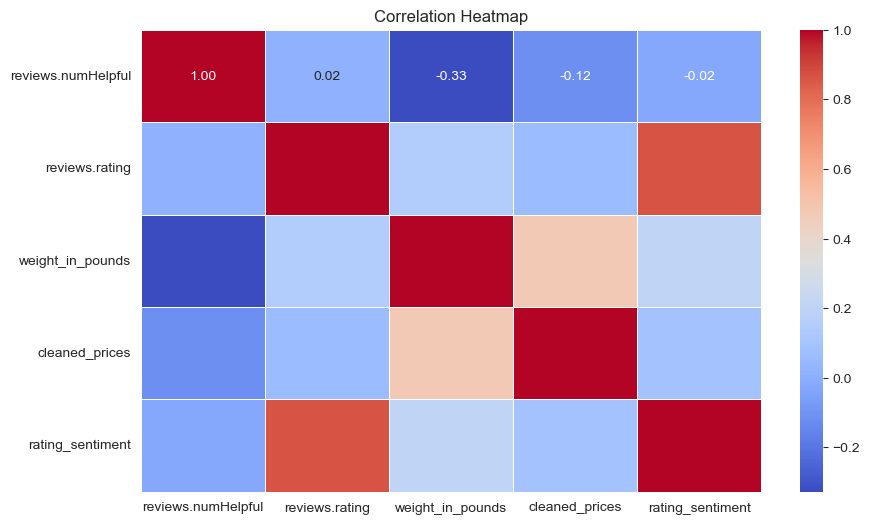

In [28]:
# Create a heatmap using seaborn
# Select only the numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## 3. Text Preprocessing

Now we are going to perform the following steps in text preprocessing for Natural Language Processing (NLP)
-  Stop word removal: Eliminating common words.
-  Stemming: Reducing words to their root forms.
-  Tokenization: Breaking text into individual units.

In [29]:
def preprocess_text(text):
    # Converting text to lowercase
    text = text.lower()
    # Removing punctuation, special characters, numbers, and single character terms
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(r'\b\w\b', '', text)
    return text

# Applying the function to the 'reviews.text' column
df['reviews.text_cleaned'] = df['reviews.text'].apply(preprocess_text)

In [30]:
print(df[['reviews.text_cleaned', 'reviews.text']].head())

                                reviews.text_cleaned  \
0   initially had trouble deciding between the pa...   
1  allow me to preface this with little history a...   
2   am enjoying it so far  great for reading  had...   
3   bought one of the first paperwhites and have ...   
4   have to say upfront don like coroporate  herm...   

                                        reviews.text  
0  I initially had trouble deciding between the p...  
1  Allow me to preface this with a little history...  
2  I am enjoying it so far. Great for reading. Ha...  
3  I bought one of the first Paperwhites and have...  
4  I have to say upfront - I don't like coroporat...  


In [31]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_text)

def stem_text(text):
    ps = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_text = [ps.stem(word) for word in tokens]
    return ' '.join(stemmed_text)

def tokenize_text(text):
    return word_tokenize(text)

# Applying the functions to the 'reviews.text_cleaned' column
df['reviews.text_cleaned'] = df['reviews.text_cleaned'].apply(remove_stopwords)
df['reviews.text_cleaned'] = df['reviews.text_cleaned'].apply(stem_text)
df['reviews.text_cleaned'] = df['reviews.text_cleaned'].apply(tokenize_text)

print(df[['reviews.text_cleaned', 'reviews.text']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                reviews.text_cleaned  \
0  [initi, troubl, decid, paperwhit, voyag, revie...   
1  [allow, prefac, littl, histori, casual, reader...   
2  [enjoy, far, great, read, origin, fire, sinc, ...   
3  [bought, one, first, paperwhit, pleas, constan...   
4  [say, upfront, like, coropor, hermet, close, s...   

                                        reviews.text  
0  I initially had trouble deciding between the p...  
1  Allow me to preface this with a little history...  
2  I am enjoying it so far. Great for reading. Ha...  
3  I bought one of the first Paperwhites and have...  
4  I have to say upfront - I don't like coroporat...  


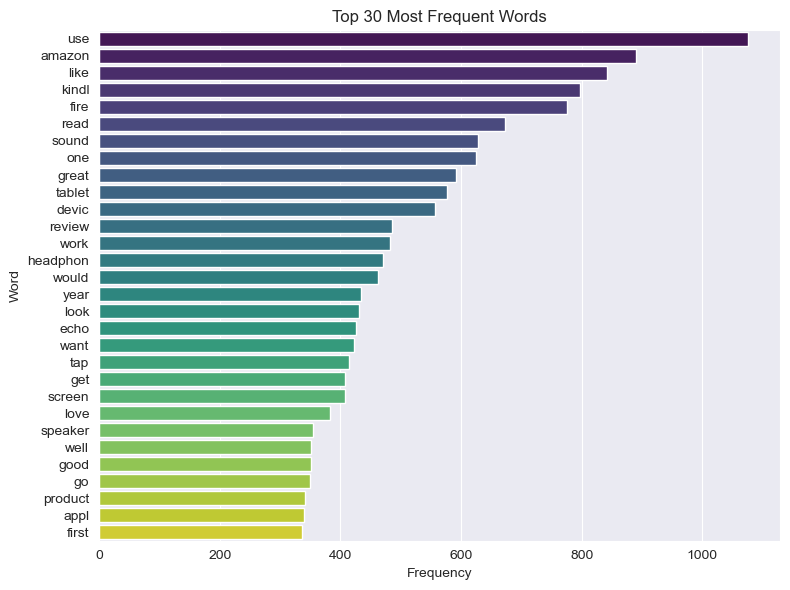

In [32]:
# Flatten the list of lists
all_words = [word for sublist in df['reviews.text_cleaned'] for word in sublist]

# Count the frequency of each word
word_counts = pd.Series(all_words).value_counts().sort_values(ascending=False)

# Plot the top N most frequent words
top_n = 30 
plt.figure(figsize=(8, 6))
sns.barplot(x=word_counts.head(top_n).values, y=word_counts.head(top_n).index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.tight_layout()
plt.show()

## 4. Feature Extraction

Now, we are going to transform preprocessed textual data into numerical representations using Bag of Words (BoW) and TF-IDF techniques.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

def add_word_frequency_feature(dataframe, text_column):
    # Joining the tokenized text lists into strings
    dataframe['joined_text'] = dataframe[text_column].apply(lambda x: ' '.join(x))
    
    # Initialize the CountVectorizer
    vectorizer = CountVectorizer()

    # Fit and transform the text data
    X = vectorizer.fit_transform(dataframe['joined_text'])

    # Convert the sparse matrix to a DataFrame
    word_frequency_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # Calculate the frequency of each word in each document
    word_frequency_df['total_word_frequency'] = word_frequency_df.sum(axis=1)

    # Add the 'total_word_frequency' column to the original DataFrame
    dataframe['total_word_frequency'] = word_frequency_df['total_word_frequency']

    # Drop the temporary 'joined_text' column
    dataframe.drop(columns=['joined_text'], inplace=True)


# Adding total word frequency feature
add_word_frequency_feature(df,'reviews.text_cleaned')

# Display the updated DataFrame
df.head()

,asins,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,weight_in_pounds,cleaned_prices,rating_sentiment,reviews.text_cleaned,total_word_frequency
0,B00QJDU3KY,Amazon,Amazon,1.0,139.0,5.0,I initially had trouble deciding between the p...,0.451948,139.99,1,"[initi, troubl, decid, paperwhit, voyag, revie...",91.0
1,B00QJDU3KY,Amazon,Amazon,1.0,126.0,5.0,Allow me to preface this with a little history...,0.451948,139.99,1,"[allow, prefac, littl, histori, casual, reader...",124.0
2,B00QJDU3KY,Amazon,Amazon,1.0,69.0,4.0,I am enjoying it so far. Great for reading. Ha...,0.451948,139.99,1,"[enjoy, far, great, read, origin, fire, sinc, ...",17.0
3,B00QJDU3KY,Amazon,Amazon,1.0,2.0,5.0,I bought one of the first Paperwhites and have...,0.451948,139.99,1,"[bought, one, first, paperwhit, pleas, constan...",154.0
4,B00QJDU3KY,Amazon,Amazon,1.0,17.0,5.0,I have to say upfront - I don't like coroporat...,0.451948,139.99,1,"[say, upfront, like, coropor, hermet, close, s...",171.0


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

def average_word_length(dataframe, text_column):
    # Joining the tokenized text lists into strings
    dataframe['joined_text'] = dataframe[text_column].apply(lambda x: ' '.join(x))
    
    # Initialize the TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the text data
    X_tfidf = vectorizer.fit_transform(dataframe['joined_text'])

    # Convert the sparse matrix to a DataFrame
    tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

    # Calculate the average word length
    word_lengths = dataframe['joined_text'].apply(lambda x: len(x.split()))
    tfidf_df['average_word_length'] = tfidf_df.mul(word_lengths, axis=0).sum(axis=1) / (tfidf_df.sum(axis=1) + 1)

    # Add the 'average_word_length' column to the original DataFrame
    dataframe['average_word_length'] = tfidf_df['average_word_length']

    # Drop the temporary 'joined_text' column
    dataframe.drop(columns=['joined_text'], inplace=True)

# Adding TF-IDF average word length
average_word_length(df,'reviews.text_cleaned')

# Display the updated DataFrame
df.head()

,asins,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,weight_in_pounds,cleaned_prices,rating_sentiment,reviews.text_cleaned,total_word_frequency,average_word_length
0,B00QJDU3KY,Amazon,Amazon,1.0,139.0,5.0,I initially had trouble deciding between the p...,0.451948,139.99,1,"[initi, troubl, decid, paperwhit, voyag, revie...",91.0,80.592518
1,B00QJDU3KY,Amazon,Amazon,1.0,126.0,5.0,Allow me to preface this with a little history...,0.451948,139.99,1,"[allow, prefac, littl, histori, casual, reader...",124.0,111.149784
2,B00QJDU3KY,Amazon,Amazon,1.0,69.0,4.0,I am enjoying it so far. Great for reading. Ha...,0.451948,139.99,1,"[enjoy, far, great, read, origin, fire, sinc, ...",17.0,13.400521
3,B00QJDU3KY,Amazon,Amazon,1.0,2.0,5.0,I bought one of the first Paperwhites and have...,0.451948,139.99,1,"[bought, one, first, paperwhit, pleas, constan...",154.0,139.096674
4,B00QJDU3KY,Amazon,Amazon,1.0,17.0,5.0,I have to say upfront - I don't like coroporat...,0.451948,139.99,1,"[say, upfront, like, coropor, hermet, close, s...",171.0,153.446084


In [35]:
# Now, we are going to create a copy of this dataset and drop the text columns
df2=df.copy()
df2.drop('reviews.text',         axis = 1, inplace = True)
df2.drop('reviews.text_cleaned',   axis = 1, inplace = True)

In [36]:
#Lets review nulls
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1177 entries, 0 to 1596
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   asins                 1177 non-null   object 
 1   brand                 1177 non-null   object 
 2   manufacturer          1177 non-null   object 
 3   reviews.doRecommend   1177 non-null   object 
 4   reviews.numHelpful    1177 non-null   float64
 5   reviews.rating        1177 non-null   float64
 6   weight_in_pounds      1177 non-null   float64
 7   cleaned_prices        1177 non-null   float64
 8   rating_sentiment      1177 non-null   int64  
 9   total_word_frequency  813 non-null    float64
 10  average_word_length   813 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 110.3+ KB


In [37]:
# Droppoing the columns with null values
df2.dropna(inplace=True)

## 5.Data Transformation

In [38]:
df2.dtypes

asins                    object
brand                    object
manufacturer             object
reviews.doRecommend      object
reviews.numHelpful      float64
reviews.rating          float64
weight_in_pounds        float64
cleaned_prices          float64
rating_sentiment          int64
total_word_frequency    float64
average_word_length     float64
dtype: object

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Columns to one-hot encode
categorical_cols = ['asins', 'brand', 'manufacturer', 'reviews.doRecommend']
# Columns to standardize (if any)
numeric_cols = ['reviews.numHelpful','weight_in_pounds','cleaned_prices','rating_sentiment','total_word_frequency','average_word_length']  # You can add numeric columns here

# Define the preprocessing steps for different column types
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
transformed_data = pipeline.fit_transform(df2)

In [40]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['asins', 'brand',
                                                   'manufacturer',
                                                   'reviews.doRecommend']),
                                                 ('num', StandardScaler(),
                                                  ['reviews.numHelpful',
                                                   'weight_in_pounds',
                                                   'cleaned_prices',
                                                   'rating_sentiment',
                                                   'total_word_frequency',
                                                   'average_word_length'])]))])

## 6.Model Building, Evaluation and Tuning

## Decision Tree

## Random Forest